In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import logomaker
import numpy as np

In [52]:
original_grad_df = pd.read_csv('figures/fig1f_grad_seq101_model7_individual.csv')
distilled_grad_df = pd.read_csv('figures/fig1f_grad_seq101_model7_distilled.csv')

model_ix = 7
seq_ix = 101


In [68]:
sample = distilled_grad_df.iloc[130:150,:].copy()
# make noise smaller
sample.iloc[:8,:] = sample.iloc[:8,:]*0.5
sample.iloc[14:,:] = sample.iloc[14:,:]*0.5

# make an "unclean" map
# noisy_sample = sample + np.random.normal(0, 0.01, size=(sample.shape[0],sample.shape[1]))*0.5
noisy_sample = distilled_grad_df.iloc[130:150,:].copy()

In [69]:
noisy_sample.iloc[:8,:] = noisy_sample.iloc[:8,:] + (np.random.normal(0, 0.01, size=(sample.iloc[:8,:].shape[0],sample.iloc[:8,:].shape[1])))
noisy_sample.iloc[14:,:] = noisy_sample.iloc[14:,:] + (np.random.normal(0, 0.01, size=(sample.iloc[14:,:].shape[0],sample.iloc[14:,:].shape[1])))


<Axes: >

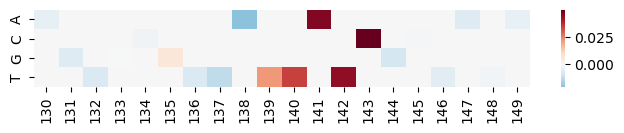

In [70]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,1))
sns.heatmap(sample.transpose(), cmap='RdBu_r', center=0)

<Axes: >

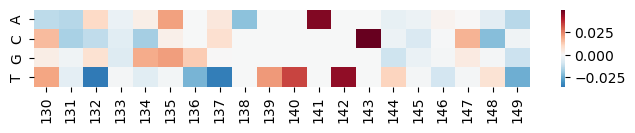

In [71]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,1))
sns.heatmap(noisy_sample.transpose(), cmap='RdBu_r', center=0)

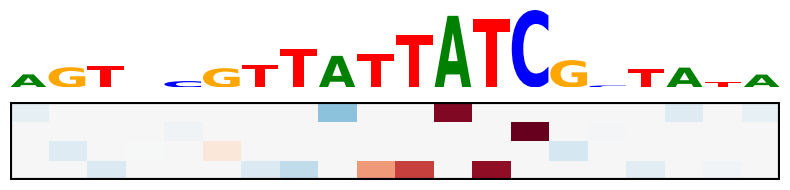

In [81]:
fig, axs = plt.subplots(2,1, figsize=(8,2))

logomaker.Logo(distilled_grad_df.iloc[130:150,:].abs(), ax=axs[0])
axs[0].axis('off')
sns.heatmap(sample.transpose(), cmap='RdBu_r', center=0, ax=axs[1], cbar=False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].axhline(y=0, color='k',linewidth=3)
axs[1].axhline(y=sample.transpose().shape[0], color='k',linewidth=3)
axs[1].axvline(x=0, color='k',linewidth=3)
axs[1].axvline(x=sample.transpose().shape[1], color='k',linewidth=3)
fig.tight_layout()
fig.show()
fig.savefig("../sample_motif_analysis_clean.pdf")

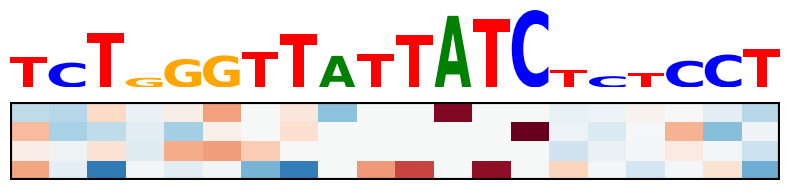

In [82]:
fig, axs = plt.subplots(2,1, figsize=(8,2))

noisy_motif = noisy_sample.abs()
# mask
m = np.zeros_like((noisy_motif*2).values)
m[np.arange(len((noisy_motif*2))), (noisy_motif*2).values.argmax(1)] = 1
noisy_motif_masked = noisy_motif*2*m
logomaker.Logo(noisy_motif_masked, ax=axs[0])
axs[0].axis('off')
sns.heatmap(noisy_sample.transpose(), cmap='RdBu_r', center=0, ax=axs[1], cbar=False)
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].axhline(y=0, color='k',linewidth=3)
axs[1].axhline(y=noisy_sample.transpose().shape[0], color='k',linewidth=3)
axs[1].axvline(x=0, color='k',linewidth=3)
axs[1].axvline(x=noisy_sample.transpose().shape[1], color='k',linewidth=3)
fig.tight_layout()
fig.show()
fig.savefig("../sample_motif_analysis_noisy.pdf")